<a href="https://colab.research.google.com/github/val93s/Machine_learning/blob/main/Copy_of_11_9_3_Activity.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Lesson 11.9.3 Activity

Customer Segmentation

You work for a large retailer that has collected customer data on sex, marital status, age, income, education, and occupation through a customer loyalty program.

The marketing department tasks you with defining groups of “similar” customers that it can use as the basis for new marketing campaigns.

In this module, we'll cluster our customer data using DBSCAN.

#Step 1: Download and save the `segmentation data.csv` dataset from the class materials  

* Make a note of where you saved the file on your computer.

#Step 2: Upload the `segmentation data.csv` dataset by running the following code block 

* When prompted, navigate to and select the `segmentation data.csv` dataset where you saved it on your computer.

In [ ]:
#Step 2

from google.colab import files
segmentation = files.upload()

Saving segmentation data.csv to segmentation data (1).csv


#Step 3: Import necessary packages

```
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
import seaborn as sns
import pandas as pd
import numpy as np
from sklearn import cluster, metrics
from sklearn.cluster import DBSCAN
```

In [ ]:
#Step 3
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
import seaborn as sns
import pandas as pd
import numpy as np
from sklearn import cluster, metrics
from sklearn.cluster import DBSCAN




# Step 4: Create a Pandas DataFrame from the CSV file
* Name the DataFrame `X`.
* Print the first five observations of `X`.  Note the kinds of data it contains.

In [ ]:
#Step 4
X = pd.read_csv('segmentation data.csv')
X.head()



,ID,Sex,Marital status,Age,Education,Income,Occupation,Settlement size
0,100000001,0,0,67,2,124670,1,2
1,100000002,1,1,22,1,150773,1,2
2,100000003,0,0,49,1,89210,0,0
3,100000004,0,0,45,1,171565,1,1
4,100000005,0,0,53,1,149031,1,1


#Step 5: Select Important Features
* Select the important features to be used in the clustering algorithm.  Hint: There is one feature that is probably *not* helpful and should be dropped.

In [ ]:
#Step 5
X.drop(columns=["ID"], axis=1, inplace=True)
X.head()



,Sex,Marital status,Age,Education,Income,Occupation,Settlement size
0,0,0,67,2,124670,1,2
1,1,1,22,1,150773,1,2
2,0,0,49,1,89210,0,0
3,0,0,45,1,171565,1,1
4,0,0,53,1,149031,1,1


#Step 6: Pre-processing

* You can use the following code to one-hot-encode the categorical features:

```
categorical_cols = ['Sex','Marital status', 'Education', 'Occupation', 'Settlement size']

X = pd.get_dummies(X, columns = categorical_cols)
```

* You can use the following code to scale the quantitative features:

```
ss = StandardScaler()

X[['Age', 'Income']] = ss.fit_transform(X[['Age', 'Income']])
```

In [ ]:
#Step 6
categorical_cols = ['Sex','Marital status', 'Education', 'Occupation', 'Settlement size']

X = pd.get_dummies(X, columns = categorical_cols)




In [ ]:
ss = StandardScaler()

X[['Age', 'Income']] = ss.fit_transform(X[['Age', 'Income']])

#Step 7: Plot the clusters using DBSCAN with the default values of epsilon (0.5) and min_samples (5)
* Again, we can't plot all of our features against the predicted clusters because there are just too many.  
* Run the following code block to create a scatterplot each participant's age and income colored by the cluster they were assigned to.
* Remember that the clusters may appear to overlap because they are being separated by other features, like sex and marital status, that aren't being shown on the graph.
* How many clusters are being fit to the data?  Does this clustering seem very useful?

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


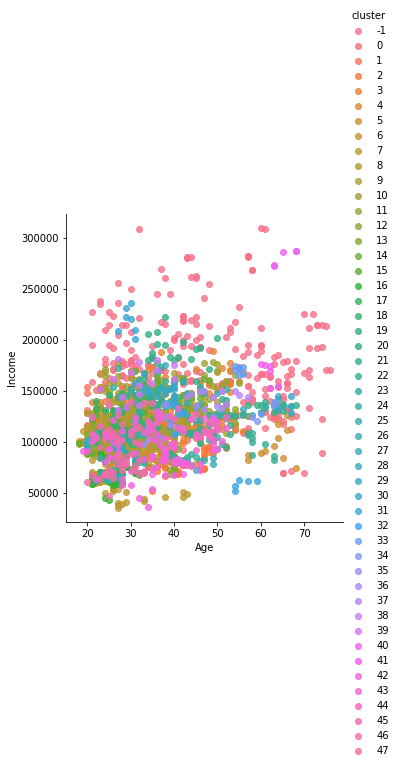

In [ ]:
#Step 7

# labels_ are assigned to every observation based on the cluster the observation is assigned to


db = DBSCAN().fit(X)
labels = pd.DataFrame(db.labels_)

labels.rename(columns={0: "cluster"}, inplace=True)

X_orig = pd.read_csv('segmentation data.csv')
graph = pd.concat([X_orig,labels], axis=1)

sns.lmplot('Age','Income', data=graph, hue='cluster', fit_reg=False)

**Step 7 Answer:**



#Step 8: Plot the clusters using DBSCAN with epsilon=1.435 and min_samples=5
* Again, we can't plot all of our features against the predicted clusters because there are just too many.  
* Run the following code block to create a scatterplot each participant's age and income colored by the cluster they were assigned to.
* Remember that the clusters may appear to overlap because they are being separated by other features, like sex and marital status, that aren't being shown on the graph.
* How does increasing the value of epsilon change how many clusters are being fit to the?  What feature does DBSCAN seem to use to determine which cluster an individual belongs to?

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


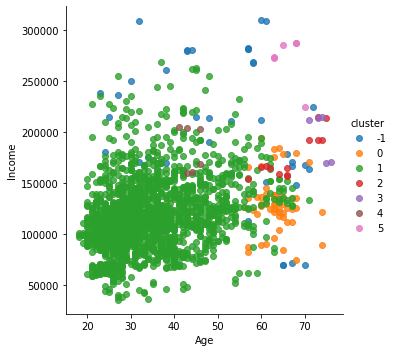

In [ ]:
#Step 8

# labels_ are assigned to every observation based on the cluster the observation is assigned to


db = DBSCAN(eps=1.435, min_samples=5).fit(X)
labels = pd.DataFrame(db.labels_)

labels.rename(columns={0: "cluster"}, inplace=True)

X_orig = pd.read_csv('segmentation data.csv')
graph = pd.concat([X_orig,labels], axis=1)

sns.lmplot('Age','Income', data=graph, hue='cluster', fit_reg=False)

**Step 8 Answer:**
